In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [168]:
df = pd.read_csv(r'C:\Users\Elie\Desktop\Note_de_broker\datas.csv')

C:\Users\Elie\AppData\Local\Temp\ipykernel_12900\3043841083.py:1: DtypeWarning: Columns (5,26,27,30,31,33,36,37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\Elie\Desktop\Note_de_broker\datas.csv')


In [169]:
# Ici la date de début correspond au premier jour du mois en cours.
# Les données s'arretent au J-1.

In [170]:
# Mettre le premier jour du mois en cours sous ce format : "mois/jour/année"

indice_début = df[df['Date'] == '2024-02-01'].index

# Mettre le Jour J-1

indice_fin = df[df['Date'] == '2024-02-23'].index

In [171]:
df = df.iloc[indice_début[0]:indice_fin[-1]+1]

**Production par catégories de technologies**

In [172]:
columns_list = ['Solaire', 'Eolien','Hydraulique','Bioenergies']
df['Prod_total'] = df[columns_list].sum(axis=1)

In [173]:
Prod_total = df.groupby(df.index // 96)['Prod_total'].sum().to_list()
Prod_Eolien = df.groupby(df.index // 96)['Eolien'].sum().to_list()
Prod_Solaire = df.groupby(df.index // 96)['Solaire'].sum().to_list()
Prod_Hydro = df.groupby(df.index // 96)['Hydraulique'].sum().to_list()
Prod_Bioenergies = df.groupby(df.index // 96)['Bioenergies'].sum().to_list()

In [174]:
Jour_du_mois = [i for i in range(1,len(Prod_total)+1)]

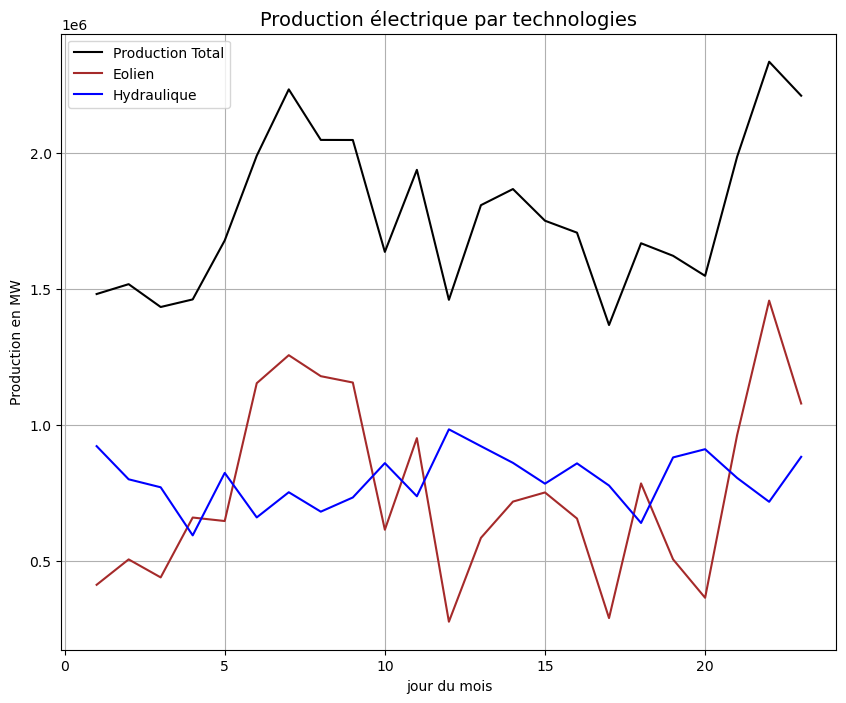

In [175]:
plt.figure(figsize=(10,8))
plt.plot(Jour_du_mois, Prod_total, label='Production Total',color = 'black')
plt.plot(Jour_du_mois, Prod_Eolien, label='Eolien', color = 'brown')
# plt.plot(Jour_du_mois, Prod_Solaire, label='Solaire')
plt.plot(Jour_du_mois, Prod_Hydro, label='Hydraulique', color = 'blue')
# plt.plot(Jour_du_mois, Prod_Bioenergies, label='Bioenergies')
plt.title('Production électrique par technologies', fontsize = 14)
plt.xlabel('jour du mois')
plt.ylabel('Production en MW')
plt.legend()

plt.grid(True)

In [176]:
#Consommation

In [177]:
Consommation = df.groupby(df.index // 96)['Consommation'].sum().to_list()

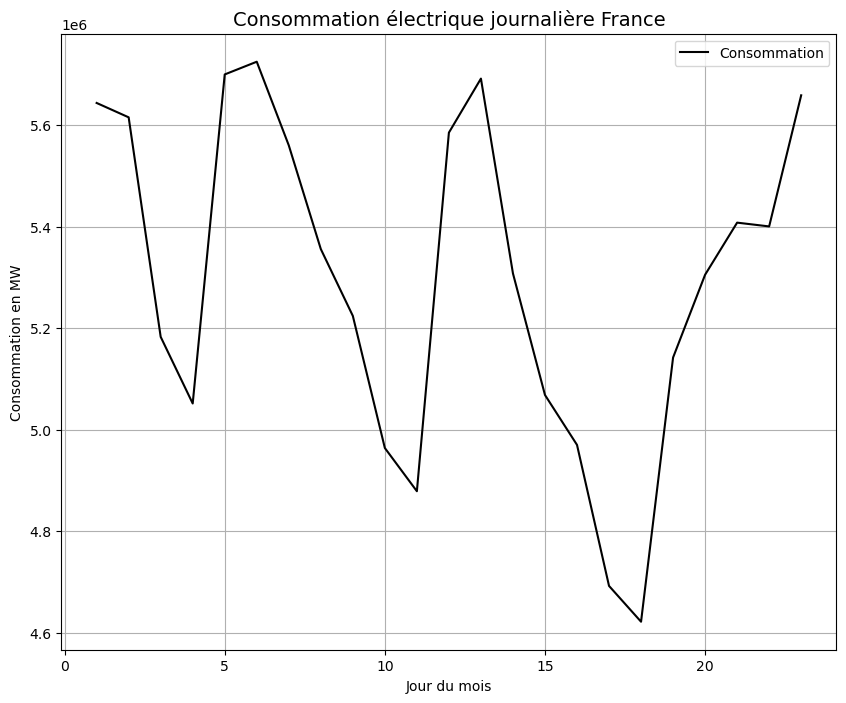

In [178]:
plt.figure(figsize=(10,8))
plt.plot(Jour_du_mois, Consommation, label='Consommation',color = 'black')
plt.title('Consommation électrique journalière France', fontsize = 14)
plt.xlabel('Jour du mois')
plt.ylabel('Consommation en MW')
plt.legend()
plt.grid(True)

In [179]:
Données_Journalières = [['Eolien', Prod_Eolien[-1]], ['Solaire', Prod_Solaire[-1]], ['Hydraulique', Prod_Hydro[-1]], ['Bioenergies', Prod_Bioenergies[-1]]]

In [180]:
df_1 = pd.DataFrame(Données_Journalières, columns=['Technologies', 'Production en MW'])
df_1

,Technologies,Production en MW
0,Eolien,1079983.0
1,Solaire,171698.0
2,Hydraulique,884108.0
3,Bioenergies,75230.0
